# A2. Models of complex networks

### Implementation of models of complex networks.
Implement generators of complex networks for, at least, two of the following models of complex networks (sorted by increasing difficulty), which must include at least one of the two last ones (BA or CM):

- Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

- Watts-Strogatz (WS) small-world model

- Barabási & Albert (BA) preferential attachment model

- Configuration Model (CM)

In [4]:
%pip install igraph -q

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Libraries
import igraph
import matplotlib.pyplot as plt
import time 
from collections import defaultdict
import numpy as np 
from typing import List
import seaborn as sns 
import numpy as np
import networkx as nx

In [66]:
## PArams
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [2]:
#Variables
N = 50 
#N = 100
#N = 1000
P = 0.003
K =  3

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)
ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. k=3, 6, 10

In [44]:

#Erdos-Rènyi (ER) networks G(N,p)
class ErdosRenyiGraph: 
    """
    Function which implements a random Erdös-Rényi (ER) Graph with the given parameters
    
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    number_of_edges : total number of edges??
    
    degrees : degrees (k)
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    
    """

    ## class for the randomly generated graphs like ER
    def __init__(self, number_of_nodes:int = 5, probabilities:float = 0.2):
        self.nodes = number_of_nodes
        self.probas = probabilities
        self.graph = self._start_network()
        self.edges = self._get_edges()
        self.igraph = igraph.Graph(edges=self.edges)
        self.degrees = self._calculate_degrees()

    
    def _plot_graph(self):
        return igraph.plot(self.igraph) 
    
    def _get_edges(self):
        return [(node, edge) for node in self.graph.keys() for edge in self.graph[node]]

    def _start_network(self):
        g = defaultdict(list)
        ## iterate through the number of nodes 
        for nodes in range(0,self.nodes):
            ## iterate through the possible connections (Node to Node)
            for edges in range(0,self.nodes):
                ## define whether a link exists
                if nodes < edges: 
                    link_exist = np.random.uniform(0,1) > self.probas
                    ## if it exists we append a connection to node_i 
                    if link_exist: 
                        g[nodes].append(edges)
        return g

    def _build_graph(self):
        ## start the network 
        self._start_network()
        print(f"Build the graph with {self.nodes} and {len(self.edges)} edges with a probability of {self.probas} and assigned the iGraph variable")

    ## calculate descriptors 
    # Degrees, Power Law Distribution
    def _calculate_degrees(self):
        return list(map(len,self.graph.values()))

    # theoretical graph
    def _plot_theoretical(self, graph):
        pass 
    # experimental graph 
    def _plot_experimental(self, graph):
        pass

In [65]:
def squareed(x):
    return x **2

## apply a function quickly 
f = lambda x: x**2
l = [1,2,3,4]
k = list(map(f,l))
print(k)


## Filter a list of values or array quickly
f = lambda x: x > 5
l = [7,8,9,99,999,1,1,1,1,2]
k = list(filter(f, l))
print(k)

[1, 4, 9, 16]
[7, 8, 9, 99, 999]


Build the graph with 20 and 105 edges with a probability of 0.37 and assigned the iGraph variable


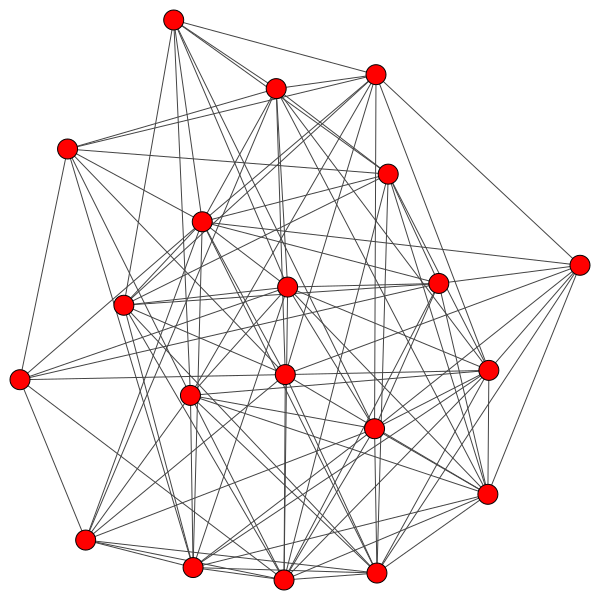

In [45]:
## Random Seed 
SEED = np.random.seed(42)
## variables 
N = 20
PROBABILITY = round(np.random.uniform(0,1), 2)
## instantiate
graph = ErdosRenyiGraph(N, PROBABILITY)
## call the constructor 
graph._build_graph()
## visualize 
graph._plot_graph()

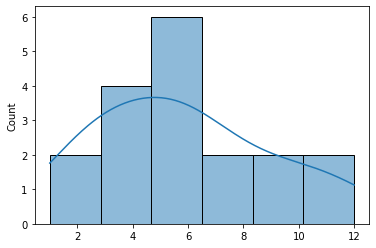

In [24]:

g = sns.histplot(graph.degrees, kde=True)
plt.show()
#plt.hist(sorted(graph.degrees),bins=8)

In [124]:
#Haciendo con un loop
tic = time.time()
l = []
for x,y in d.items():
    l.append((x,y))
print(l)
toc = time.time()
print(f"It took {toc-tic} seconds")

#Haciendo con comprension de lista
tic = time.time()
s = [len(x) for _,x in d.items()]
print(s)
toc = time.time()
print(f"It took {toc-tic} seconds")

#Haciendo con map
tic = time.time()
t = list(map(len,d.values()))
print(t)
toc = time.time()
print(f"It took {toc-tic} seconds")

[(0, [1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 14]), (1, [3, 6, 7, 8, 17]), (2, [3, 4, 6, 7, 9, 10, 13, 14, 17, 18, 19]), (3, [5, 6, 9, 10, 11, 12, 14, 15, 18]), (4, [9, 10, 11, 12, 13, 15, 16, 17, 18]), (5, [8, 9, 11, 12]), (6, [8, 10, 11, 12, 14, 15, 16, 17]), (7, [8, 9, 10, 11, 13, 16, 17]), (8, [9, 11, 13, 14, 19]), (9, [11, 13, 14, 15, 16, 17, 19]), (10, [11, 12, 14, 15, 18, 19]), (11, [12, 14, 18, 19]), (12, [13, 15, 16, 17, 18, 19]), (13, [14, 16, 17, 19]), (14, [15, 16, 17, 18]), (15, [16, 17]), (16, [17, 18, 19]), (17, [18, 19])]
It took 0.0007574558258056641 seconds
[11, 5, 11, 9, 9, 4, 8, 7, 5, 7, 6, 4, 6, 4, 4, 2, 3, 2]
It took 0.00014472007751464844 seconds
[11, 5, 11, 9, 9, 4, 8, 7, 5, 7, 6, 4, 6, 4, 4, 2, 3, 2]
It took 8.440017700195312e-05 seconds


In [1]:

## we set a seed 
def deterministic(seed=int) -> np.random.seed:
    return np.random.seed(seed)
SEED = deterministic(42)
## instantiate an empty graph 

## number of nodes
N = 5
## number of edges 
M = 10
## get a random probability 
link_exist = 0.5 > np.random.uniform(0,1)
#print(link_exist)
## 
from typing import List
def generate_random_graph(number_of_nodes:int, probability:float) -> defaultdict(List[int]):
    """generates a random graph"""    
    ## instantiate a random graph 
    g = defaultdict(list)
    ## iterate through the number of nodes 
    for nodes in range(0,number_of_nodes):
        ## iterate through the possible connections (Node to Node)
        for edges in range(0,number_of_nodes):
            ## define whether a link exists
            if nodes < edges: 
                link_exist = np.random.uniform(0,1) > probability
                ## if it exists we append a connection to node_i 
                if link_exist: 
                    g[nodes].append(edges)
    return g

def make_graph(graph:defaultdict(List[int])) -> igraph.Graph:
    """Convert a dictionary into an igraph.Graph"""
    ## first we need to get the (nodes, edges) pairs 
    edges = [(node, edge) for node in graph.keys() for edge in graph[node]]
    ## build the igraph.Graph 
    graph = igraph.Graph(edges=edges)
    return graph 


NameError: name 'np' is not defined

## 2. Watts-Strogatz (WS) small-world model
WS: different values of <k> and "p", including p=0, e.g. p=0.0, 0.1, 0.2, 0.5, 0.9, 1.0, and <k>=2, 4, 6

<CoordinatesMap with 2 world coordinates:

  index aliases    type   unit wrap format_unit visible
  ----- ------- --------- ---- ---- ----------- -------
      0     lon longitude  deg  180         deg     yes
      1     lat  latitude  deg None         deg     yes

>

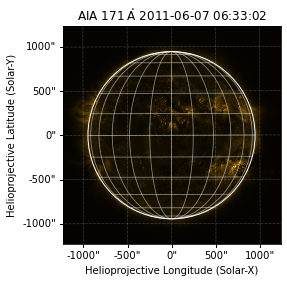

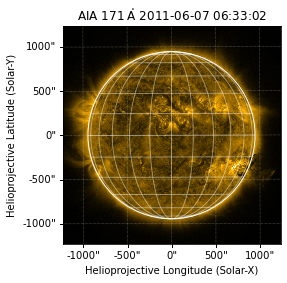

## 3. Barabási & Albert (BA) preferential attachment model
BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

In [47]:
nodes = 20
p = 0.2
k = np.random.uniform(size=(nodes,nodes))
kk = (k > p).astype(int)
G = nx.from_numpy_matrix(kk)

In [363]:
import matplotlib.colors as mcolors
## this shit works
def centrality(graph, centr_type, title):
    """This function creates a represntation for a given centrality type and for a given graph.
    graph : networkx graph object
    centr_type : type of centrality on a given graph, for example : nx.degree_centrality(graph)
    title : string for the title of the representation.
    """

    plt.figure(dpi=150)
    pos = nx.spring_layout(graph)
    nodes = nx.draw_networkx_nodes(
        graph,
        pos,
        node_size=250,
        cmap=plt.cm.plasma,
        node_color=list(centr_type.values()
                        ),  # color nodes according to their centrality values
        nodelist=list(centr_type.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    labels = nx.draw_networkx_labels(graph, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(title)
    plt.colorbar(nodes)
    plt.axis('off')

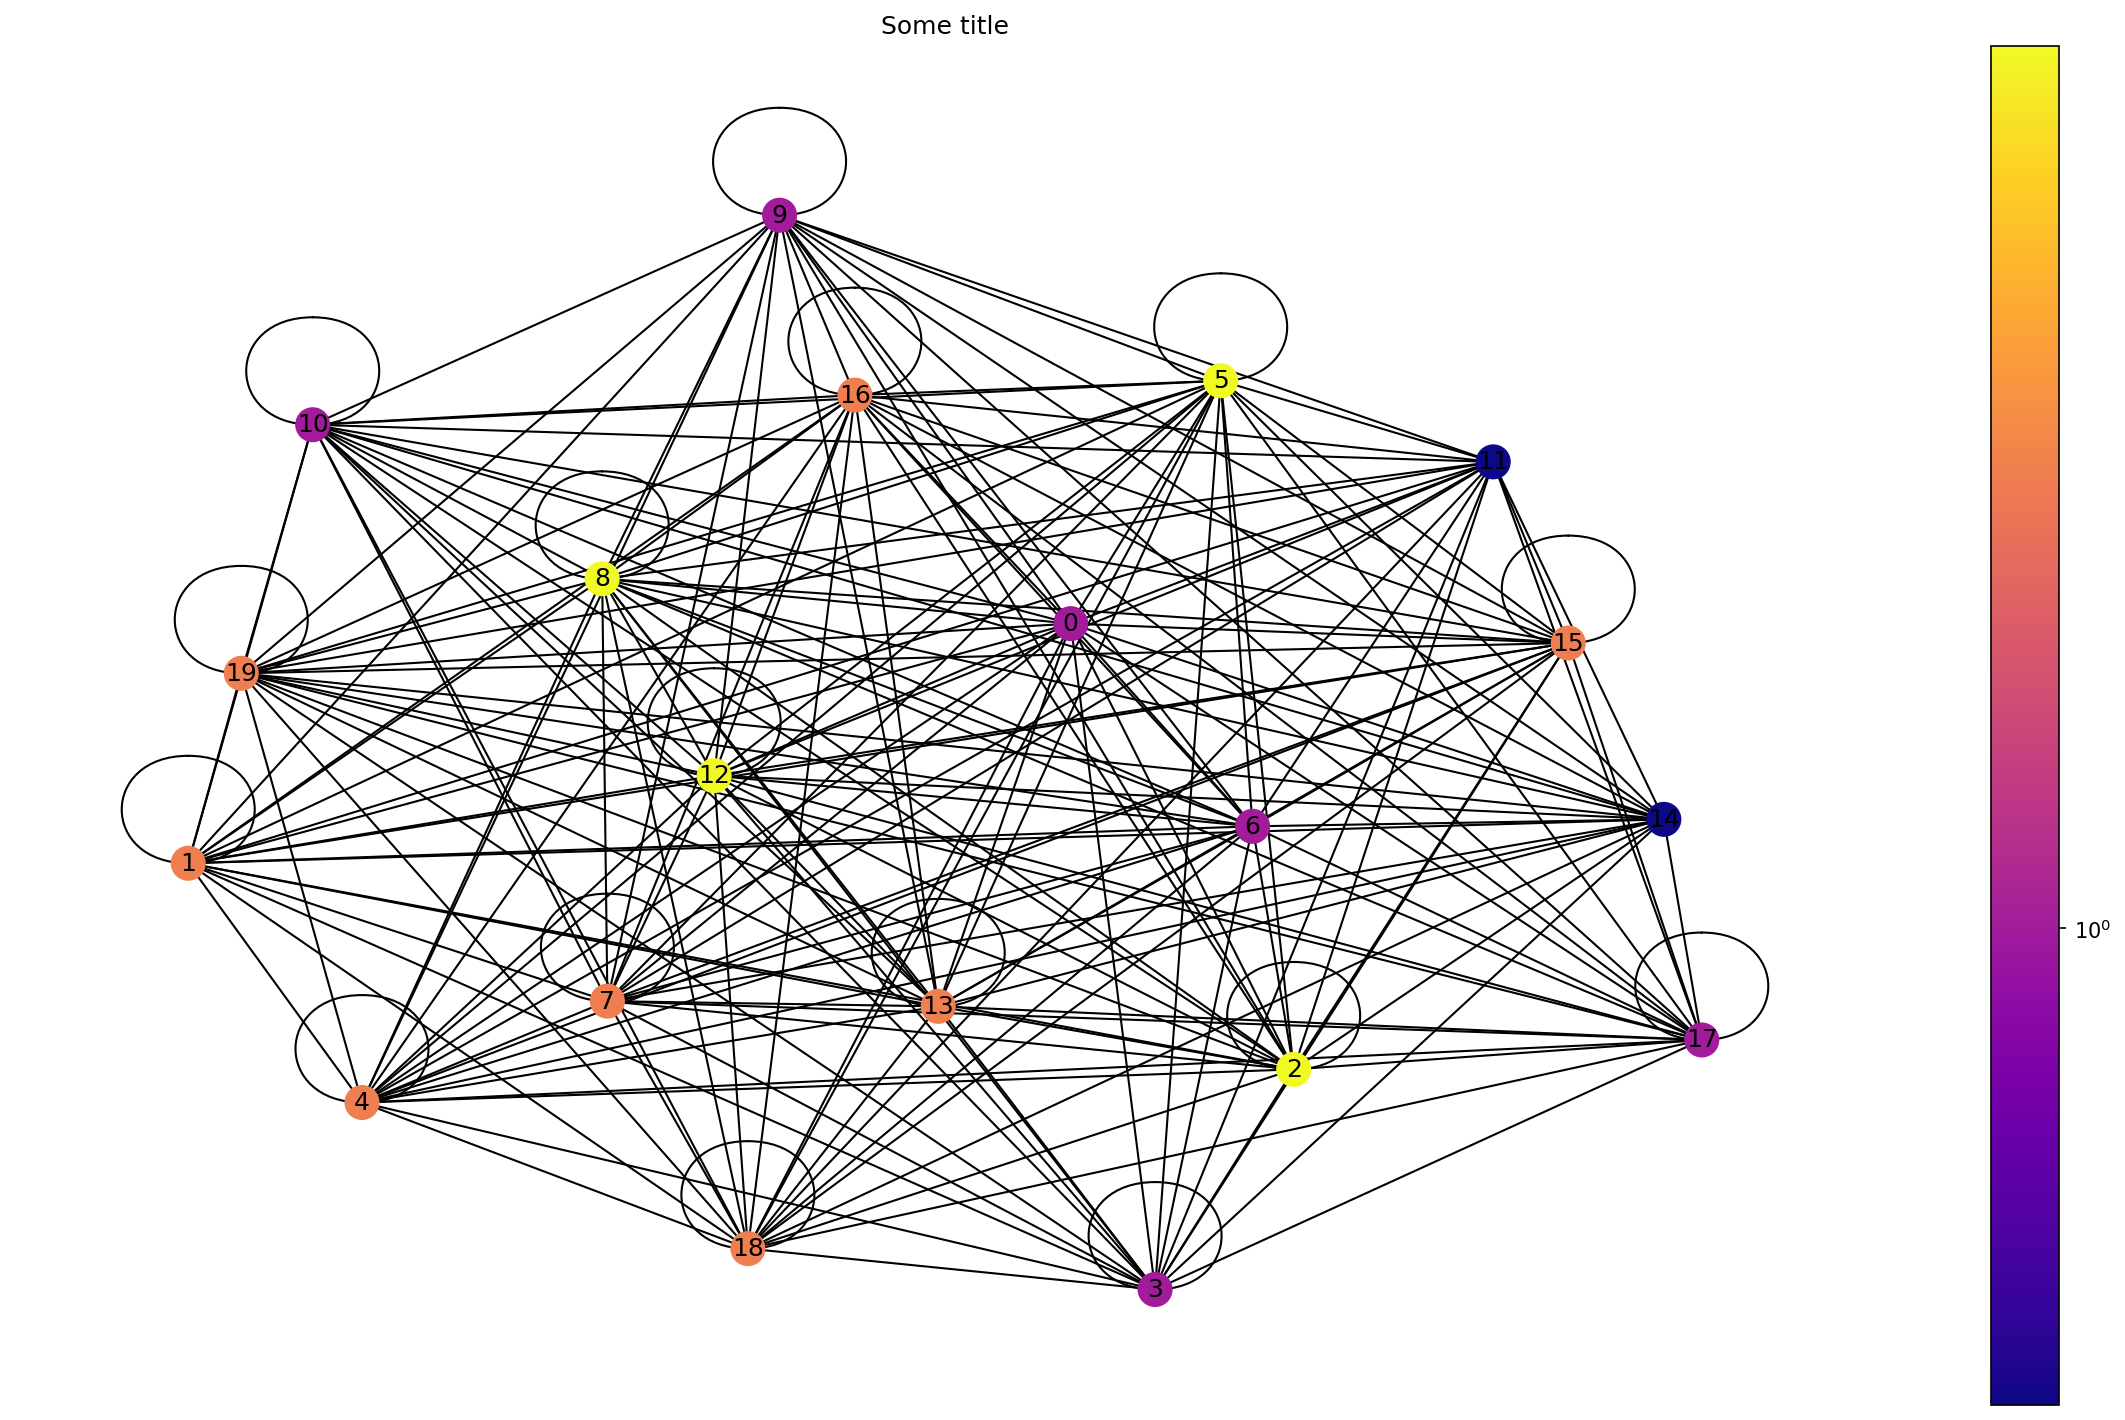

In [364]:
rcParams['figure.figsize'] = 20,12
degrees = nx.degree_centrality(G)
eigen_centr = nx.eigenvector_centrality(G)
betweenees = nx.betweenness_centrality(G)
centrality(G, degrees, "Some title")

In [426]:
"""
1. Generamos un grafo con N nodos 
2. Elegimos nodo a cual agregar nuevo nodo (degree y probabilidad)
3. agregamos nodo 
repetir 2-3 hasta llegar al tamanio querido 
----------------------------------------------------------
INPUT: 
    - m (degree per node)
    - Numero de nodos final
OUTPUT:
    - Network con numero de nodos y degree deseado 
----------------------------------------------------------
Ejemplo: 
m = 3 (m>1)
para cada nodo, repetimos paso 2, 3 veces, para tener 3 conexiones. 
y se actualiza todo para cada nuevo edge / conexion que se hace. 
"""


def BA_lbert(nodes):
    adjacency_matrix = np.random.randint(10, size=(nodes,nodes))
    np.fill_diagonal(adjacency_matrix, 0)
    network = nx.from_numpy_matrix(adjacency_matrix)
    #network = network.remove_edges_from(nx.selfloop_edges(network))
    nx.draw(network,with_labels=True)
    plt.title("Barabási-Albert")
    plt.show()
    
    
    return network, adjacency_matrix


def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dic1,matrix):
    # Compute the degree with the matrix
    for i in range(0,len(matrix)):
        degree_for_node = matrix[i,:]
        dic1 = sum((degree_for_node > 0).astype(int))
        print(dic1)

    dic1 = degrees

    return dic1



    



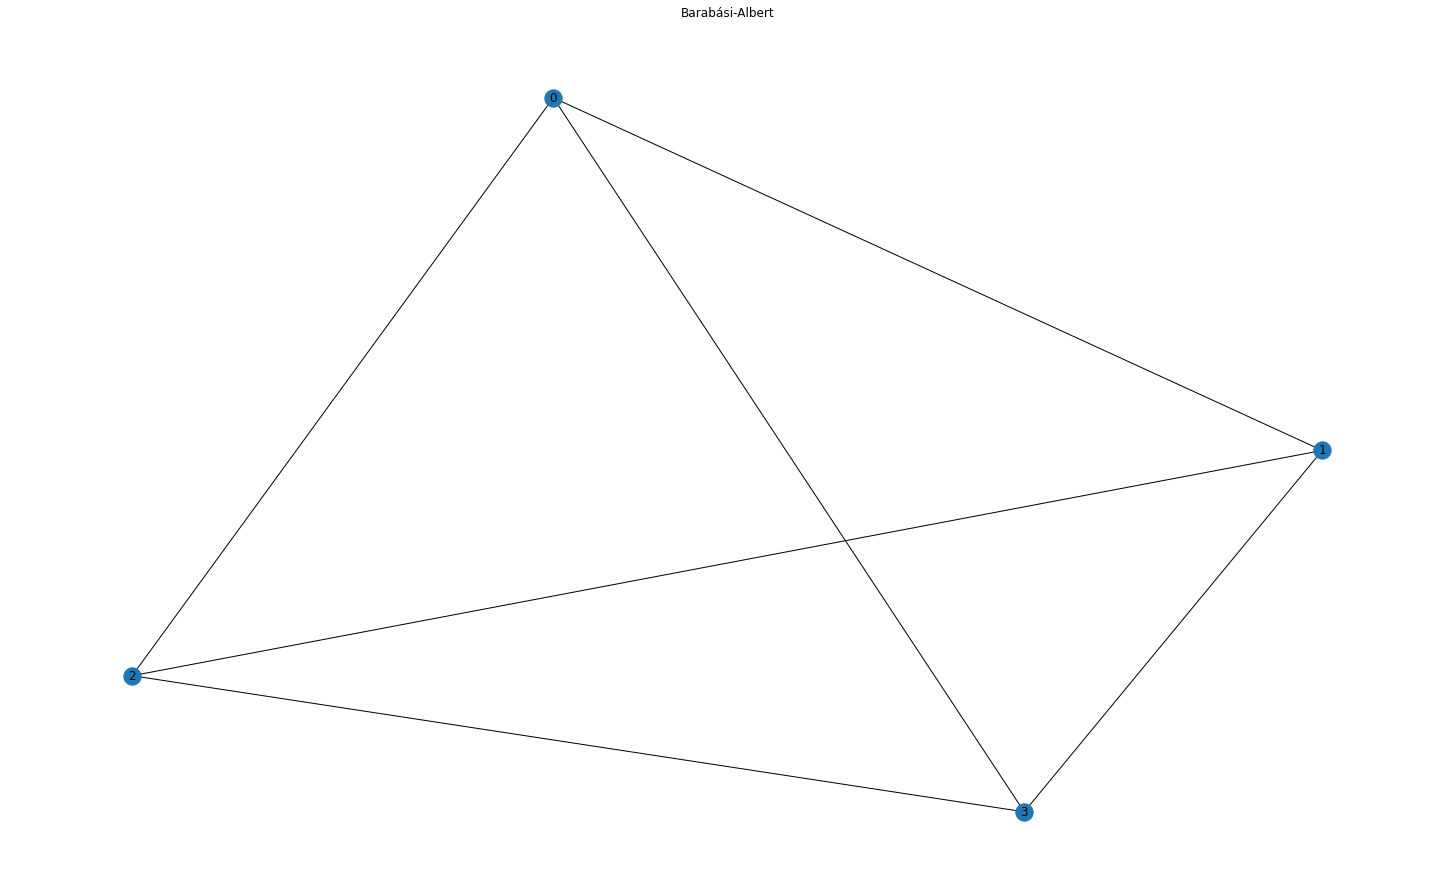

AttributeError: 'numpy.ndarray' object has no attribute 'degree'

In [430]:
    
#PLotear inicial
k,adjacency_M = BA_lbert(4)
#Calcular degrees y sacar dictionary

degrees, sum_degree = degrees_sum(adjacency_M) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

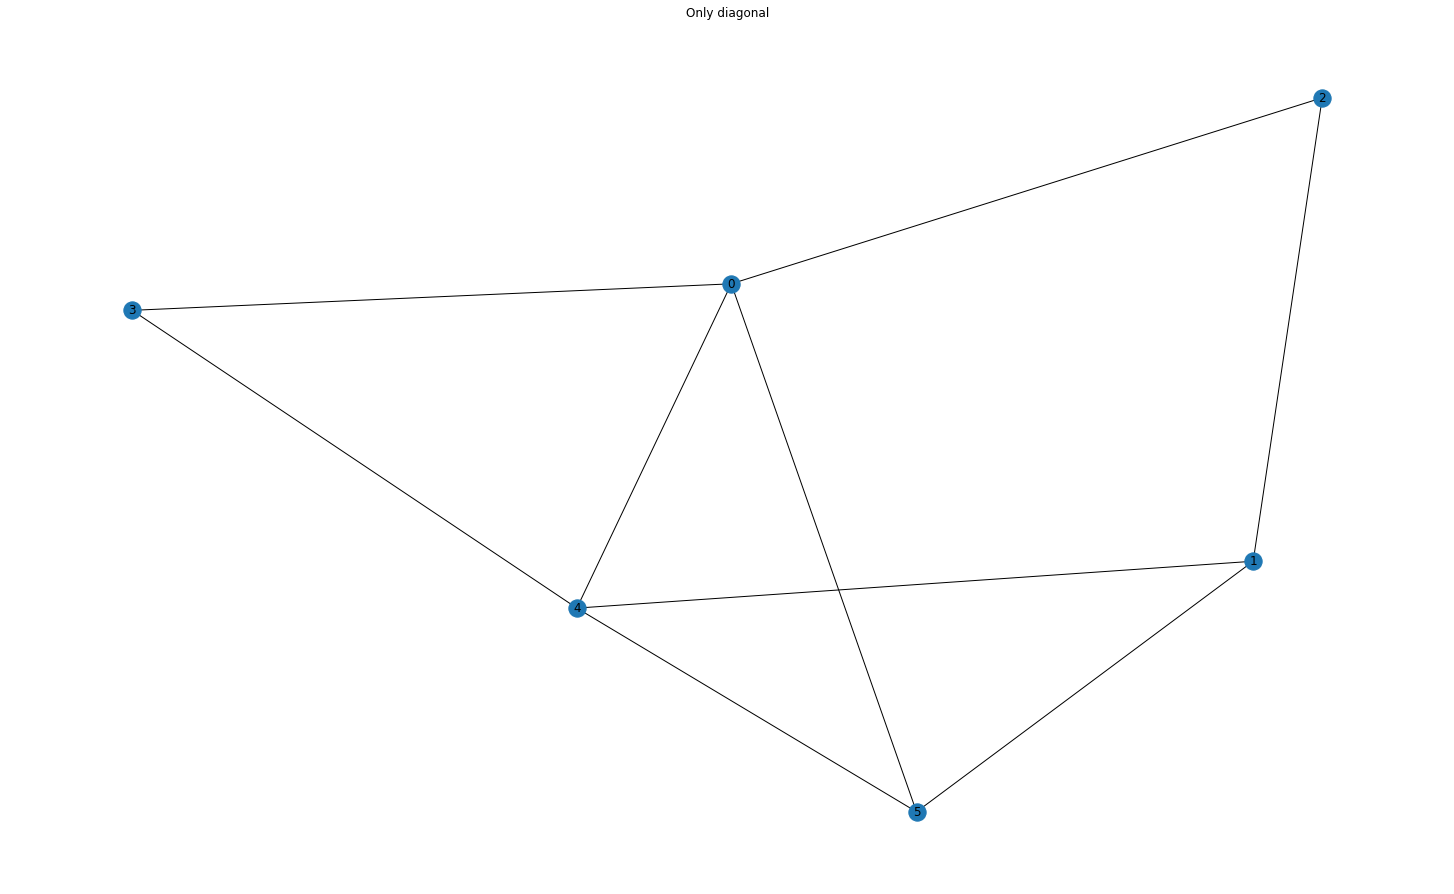

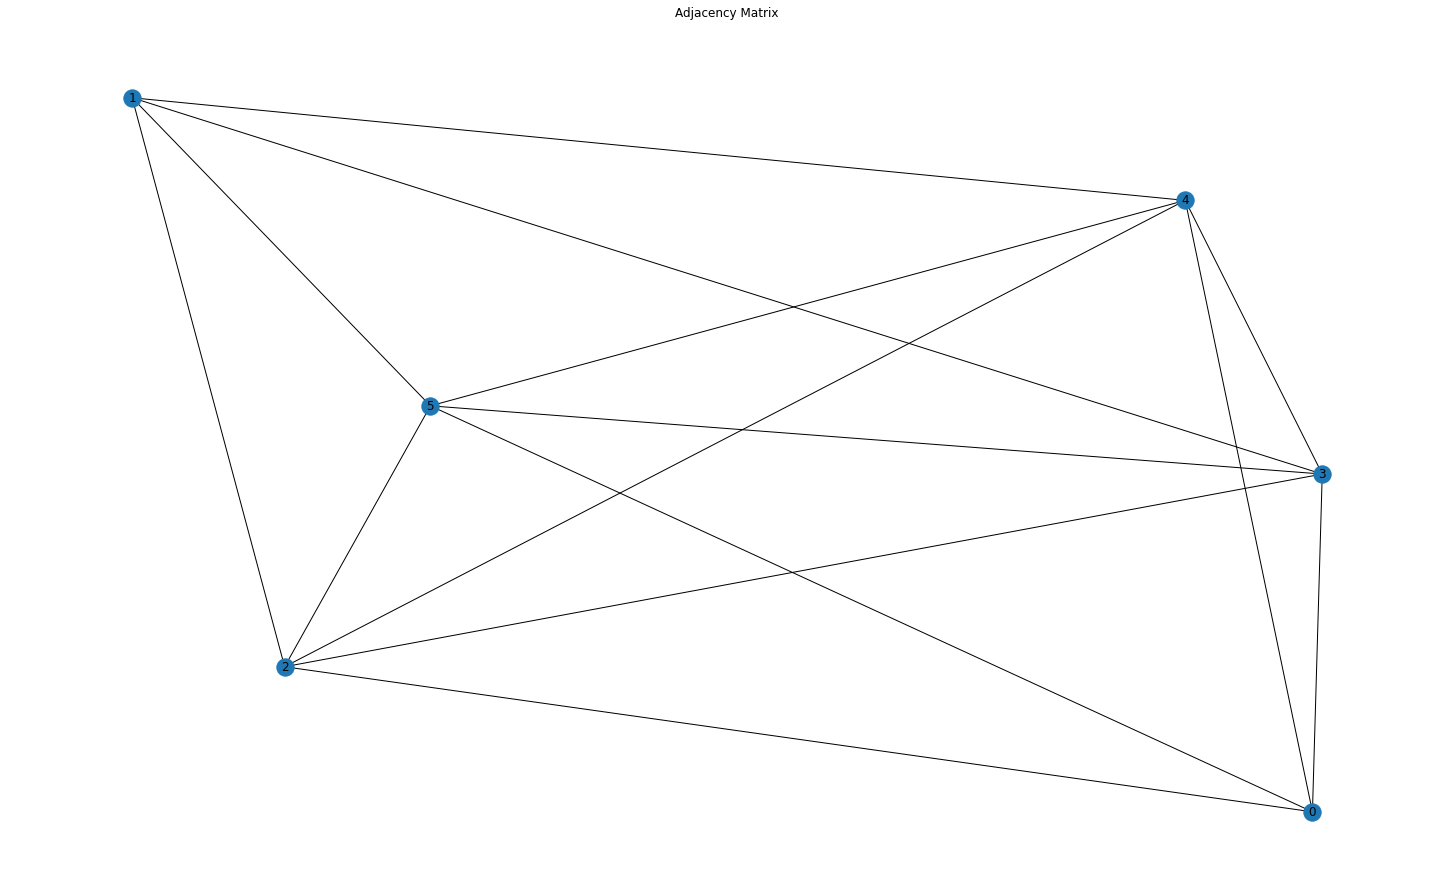

TypeError: 'dict' object is not callable

In [388]:
#Experiment to print the graph with directed and undirectd way

nodes = 6
adjacency_matrix = np.random.randint(low=0,high=2, size=(nodes,nodes))
np.fill_diagonal(adjacency_matrix, 0)
test = np.triu(adjacency_matrix)
graph = nx.from_numpy_array(test)
graph1 = nx.from_numpy_array(adjacency_matrix)
#print(dict(graph.degree()).values())
#np.fill_diagonal(adjacency_matrix, 0)
#assert sum(adjacency_matrix.diagonal()) == 0
nx.draw(graph,with_labels=True)
plt.title("Only diagonal")
plt.show()
nx.draw(graph1,with_labels=True)
plt.title("Adjacency Matrix")
plt.show()
def get_degree(x):
    a = dict(x.degree()).values()
    counter = [x for x in a]
    return counter

d1 = get_degree(graph)
print(sum(d1)/len(d1))
d2 = get_degree(graph1)
print(sum(d2)/len(d2))


In [392]:
b = np.random.randint(3,size=(3,3))
a[:b.shape[0],:b.shape[1]] = b
print(b)
print(a)

[[2 2 1]
 [1 1 2]
 [0 2 2]]
[[2. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [396]:
adjacency_matrix
np.triu(adjacency_matrix)

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

In [398]:
dict(G.degree()).values()

TypeError: 'dict' object is not callable

In [399]:
type(G)

networkx.classes.graph.Graph

In [377]:
##
#dict = {}       # Degree dictionary

def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dict,bin_index):
    
    pass






In [394]:
degrees, sum_degree = degrees_sum(G) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

TypeError: 'dict' object is not callable

In [200]:
degrees, sum_degree

(array([19, 20, 21, 19, 20, 21, 19, 20, 21, 19, 19, 18, 21, 20, 18, 20, 20,
        19, 20, 20]),
 394)

In [201]:
degree_bin, degree_random

(array([ 19,  39,  60,  79,  99, 120, 139, 159, 180, 199, 218, 236, 257,
        277, 295, 315, 335, 354, 374, 394]),
 316.4675693231123)

In [202]:
val_bin

(15, 16)

In [425]:

d = {"1":1,"2": 5,"3": 4,"4": 5}

nuevo = update_node_to_add(d,adjacency_matrix)


4
3
2
4
3
3


In [411]:
print(nuevo)

3


## Test

TypeError: 'int' object is not iterable

## 4. Configuration Model (CM)

CM: different degree distributions: Poisson (ER), e.g. <k>=2, 4; power-law (SF) with different exponents, e.g. gamma=2.2, 2.7, 3.5



In [ ]:
## 2.